# Explore here

It's recommended to use this notebook for exploration purposes.

In [ ]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://ycharts.com/companies/TSLA/revenues'
html_data = requests.get(url, time.sleep(10)).text

if "403 ERROR" in html_data:
    headers = {"User-Agent" : "Mozilla/5.0 (X11; Linux x86_64; rv:12.0) Gecko/20100101 Firefox/12.0"}
    html_data = requests.get(url, headers=headers)
    time.sleep(10)
    html_data = html_data.text

html_data




In [ ]:
soup = BeautifulSoup(html_data, 'html.parser')
soup

In [ ]:
tables = soup.find_all('table')
tables

In [ ]:
for index, table in enumerate(tables):
    if("Date" in str(table)):
        table_index = index
        break
    print(table)
table_index

In [48]:
import pandas as pd

tesla_df = pd.DataFrame(columns=["Date", "Revenue"])
for row in tables[table_index].find_all('tr'):
    col = row.find_all('td')
    if (col !=[]):
        date = col[0].text
        revenue = float(col[1].text.strip().replace('B',''))
        tesla_df = pd.concat([tesla_df, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])], ignore_index=True)

tesla_df

C:\Users\Miguel\AppData\Local\Temp\ipykernel_3924\1178543308.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tesla_df = pd.concat([tesla_df, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])], ignore_index=True)


,Date,Revenue
0,"December 31, 2023",25.170
1,"September 30, 2023",23.350
2,"June 30, 2023",24.930
3,"March 31, 2023",23.330
4,"December 31, 2022",24.320
5,"September 30, 2022",21.450
6,"June 30, 2022",16.930
7,"March 31, 2022",18.760
8,"December 31, 2021",17.720
9,"September 30, 2021",13.760


In [45]:
import sqlite3

conn = sqlite3.connect('tesla.db')
c = conn.cursor()

c.execute('CREATE TABLE IF NOT EXISTS tesla_revenue (date TEXT, revenue REAL)')
conn.commit()

tesla_df.to_sql('tesla_revenue', conn, if_exists='append', index = False)

25

In [47]:
c.execute('SELECT * FROM tesla_revenue').fetchall()

[('December 31, 2023', 25.17),
 ('September 30, 2023', 23.35),
 ('June 30, 2023', 24.93),
 ('March 31, 2023', 23.33),
 ('December 31, 2022', 24.32),
 ('September 30, 2022', 21.45),
 ('June 30, 2022', 16.93),
 ('March 31, 2022', 18.76),
 ('December 31, 2021', 17.72),
 ('September 30, 2021', 13.76),
 ('June 30, 2021', 11.96),
 ('March 31, 2021', 10.39),
 ('December 31, 2020', 10.74),
 ('September 30, 2020', 8.771),
 ('June 30, 2020', 6.036),
 ('March 31, 2020', 5.985),
 ('December 31, 2019', 7.384),
 ('September 30, 2019', 6.303),
 ('June 30, 2019', 6.35),
 ('March 31, 2019', 4.541),
 ('December 31, 2018', 7.226),
 ('September 30, 2018', 6.824),
 ('June 30, 2018', 4.002),
 ('March 31, 2018', 3.409),
 ('December 31, 2017', 3.288)]

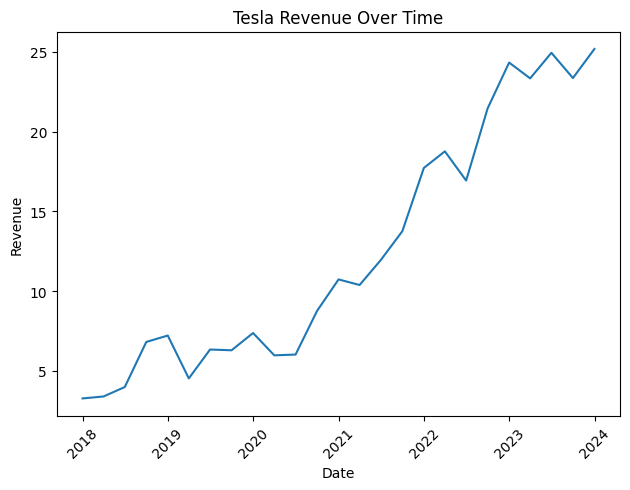

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])

sns.lineplot(x='Date', y='Revenue', data=tesla_df)
plt.title("Tesla Revenue Over Time")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

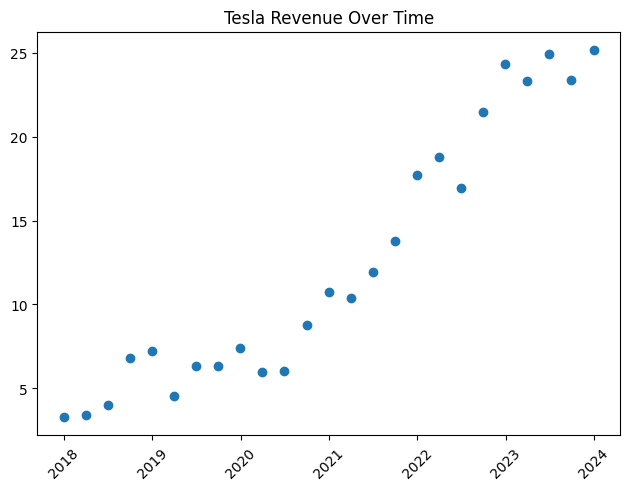

In [50]:
plt.scatter(tesla_df['Date'],tesla_df['Revenue'])
plt.title("Tesla Revenue Over Time")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Date
2017     3.288
2018    21.461
2019    24.578
2020    31.532
2021    53.830
Name: Revenue, dtype: float64


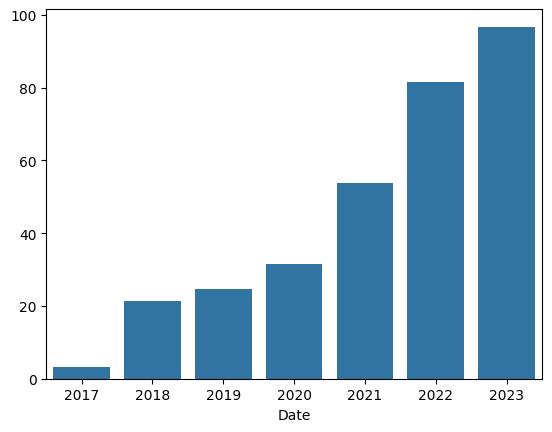

In [57]:
tesla_revenue_anual = tesla_df.groupby(tesla_df['Date'].dt.year)['Revenue'].sum()
print(tesla_revenue_anual.head())

sns.barplot(x=tesla_revenue_anual.index, y=tesla_revenue_anual.values)
plt.show()

In [ ]:
tesla_revenue_anual = tesla_df.groupby(tesla_df['Date'].dt.year)['Revenue'].sum()
print(tesla_revenue_anual.head())
sns.barplot(x=tesla_revenue_anual.index, y=tesla_revenue_anual.values)
plt.show()

In [ ]:
tesla_revenue_anual = tesla_df.groupby(tesla_df['Date'].dt.year)['Revenue'].sum()
print(tesla_revenue_anual.head())
sns.barplot(x=tesla_revenue_anual.index, y=tesla_revenue_anual.values)
plt.show()